<a href="https://colab.research.google.com/github/Nyarelia/breast_cancer_linear_regression/blob/main/breast_cancer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [25]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = load_breast_cancer()

In [4]:
type(data)

sklearn.utils._bunch.Bunch

In [5]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
data.data.shape

(569, 30)

In [7]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
data.target.shape

(569,)

In [9]:
data.feature_names # In corresponding order

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    data.data,
    data.target,
    random_state=80085,
    test_size=0.2)

In [11]:
N, D = X_train.shape

In [12]:
N, D

(455, 30)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Does both fit and transform in one step
X_test = scaler.transform(X_test)

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [15]:
# # Alt way
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

In [16]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
15/15 [==============================] - 3s 25ms/step - loss: 0.5282 - accuracy: 0.7934 - val_loss: 0.4615 - val_accuracy: 0.8246
Epoch 2/100
15/15 [==============================] - 0s 8ms/step - loss: 0.4698 - accuracy: 0.8352 - val_loss: 0.4135 - val_accuracy: 0.8596
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 0.4243 - accuracy: 0.8747 - val_loss: 0.3744 - val_accuracy: 0.8860
Epoch 4/100
15/15 [==============================] - 0s 7ms/step - loss: 0.3865 - accuracy: 0.8923 - val_loss: 0.3428 - val_accuracy: 0.9211
Epoch 5/100
15/15 [==============================] - 0s 7ms/step - loss: 0.3565 - accuracy: 0.8989 - val_loss: 0.3161 - val_accuracy: 0.9298
Epoch 6/100
15/15 [==============================] - 0s 8ms/step - loss: 0.3318 - accuracy: 0.9077 - val_loss: 0.2933 - val_accuracy: 0.9474
Epoch 7/100
15/15 [==============================] - 0s 7ms/step - loss: 0.3099 - accuracy: 0.9209 - val_loss: 0.2744 - val_accuracy: 0.9474
Epoch 8/100


In [18]:
print('Train score:', model.evaluate(X_train, y_train))
print('Test score:', model.evaluate(X_test, y_test))

15/15 [==============================] - 0s 5ms/step - loss: 0.0878 - accuracy: 0.9802
Train score: [0.08775365352630615, 0.9802197813987732]
4/4 [==============================] - 0s 6ms/step - loss: 0.0776 - accuracy: 0.9912
Test score: [0.0775921642780304, 0.9912280440330505]


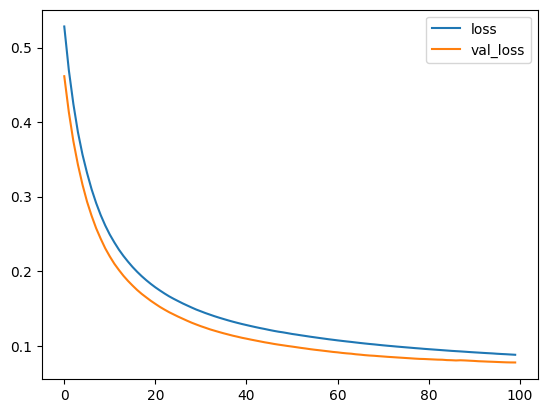

In [19]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

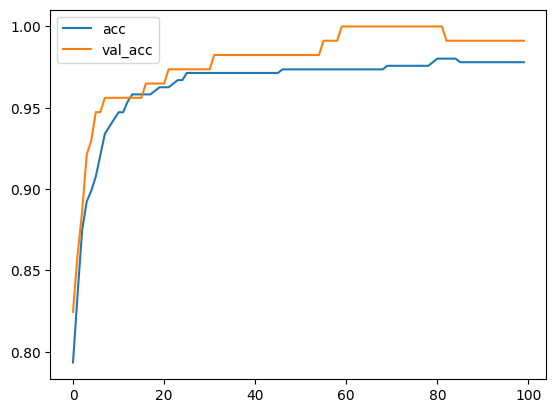

In [20]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();

In [23]:
P = model.predict(X_test)
print(P)

4/4 [==============================] - 0s 2ms/step
[[9.30960305e-05]
 [9.96605515e-01]
 [8.66918015e-07]
 [3.99560601e-01]
 [2.02025782e-04]
 [2.76041497e-02]
 [9.99060452e-01]
 [9.98749733e-01]
 [4.22402889e-01]
 [9.99814808e-01]
 [8.75524640e-01]
 [9.28563531e-03]
 [4.76168096e-03]
 [9.99388099e-01]
 [7.40119636e-01]
 [3.19160149e-02]
 [9.83571887e-01]
 [9.94179487e-01]
 [9.47984517e-01]
 [2.05378085e-02]
 [1.62482247e-05]
 [5.39072394e-01]
 [9.98005688e-01]
 [9.89183307e-01]
 [9.80221152e-01]
 [9.12990689e-01]
 [6.26186356e-02]
 [9.91160989e-01]
 [3.14130937e-03]
 [9.80391026e-01]
 [9.97826993e-01]
 [5.65183014e-02]
 [3.46602082e-01]
 [4.22586563e-05]
 [9.99961138e-01]
 [1.95592523e-01]
 [9.92595732e-01]
 [2.02928752e-01]
 [1.69910993e-02]
 [9.95072901e-01]
 [6.07158005e-01]
 [9.96388793e-01]
 [9.98970270e-01]
 [2.66106980e-07]
 [9.97326970e-01]
 [1.19915619e-01]
 [1.87422658e-04]
 [9.93739367e-01]
 [9.63621974e-01]
 [9.53979850e-01]
 [9.95044947e-01]
 [1.72131127e-04]
 [2.86129449e

In [26]:
P = np.round(P).flatten()
print(P)

[0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1.
 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]


In [27]:
# Calculate the accuracy, compare it to evaluate() output
print("Manually calculated accuracy:", np.mean(P == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9912280701754386
4/4 [==============================] - 0s 4ms/step - loss: 0.0776 - accuracy: 0.9912
Evaluate output: [0.0775921642780304, 0.9912280440330505]


In [28]:
# Saving model
model.save('linearclassifierbreastcancer.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
# Check that the model file exists
!ls -lh

total 24K
-rw-r--r-- 1 root root  20K Jun  6 13:22 linearclassifierbreastcancer.h5
drwxr-xr-x 1 root root 4.0K Jun  4 13:37 sample_data


In [31]:
# Let's load the model and confirm that it still works
# Note: there is a bug in Keras where load/save only works if you DON'T use the Input() layer explicitly
# So, make sure you define the model with ONLY Dense(1, input_shape=(D,))
# At least, until the bug is fixed
# https://github.com/keras-team/keras/issues/10417
model = tf.keras.models.load_model('linearclassifierbreastcancer.h5')
print(model.layers)
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.0776 - accuracy: 0.9912


[0.0775921642780304, 0.9912280440330505]

In [32]:
# Download the file
from google.colab import files
files.download('linearclassifierbreastcancer.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>